In [3]:
# pandas
import pandas as pd
from pandas import Series,DataFrame
import math


# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection  import *
from sklearn.linear_model  import *

#### Exercise 1: Open titanic.csv dataset in padnas

In [4]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Exercise 6: Locate NaN values of Age variable and change them to np.median( [Age] )

In [5]:
age_median = titanic_df['Age'].median()

titanic_df['Age'] = titanic_df.Age.fillna(age_median)

# titanic_df.isna().sum()

#### Exercise 2: Split dataset to train and test subdatasets

In [6]:
age_median = titanic_df['Age'].median()

titanic_df['Age'] = titanic_df.Age.fillna(age_median)

# titanic_df.isna().sum()

In [7]:
#PassengerID not included as it is not important for predictions

features_numeric = ['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']
features_cat = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [8]:
#k-fold split

acc = 0
folds = 5
train_n_test = []
for train_index,test_index in model_selection.KFold(folds).split(titanic_df):
    train_n_test.append((train_index,test_index))
    
## Pick which dataset to use out of the k-fold
data_set_no = 0    # First dataset
train_index = train_n_test[data_set_no][0]   #train
test_index =  train_n_test[data_set_no][1]   #test

## Choose the target (Survived) 
X_train = titanic_df.loc[train_index, features_numeric]
y_train = titanic_df.loc[train_index, 'Survived']

X_test = titanic_df.loc[test_index, features_numeric]
y_test = titanic_df.loc[test_index, 'Survived']

#### Exercise 3: Draw distributions of all numeric variables

In [9]:
features_numeric[0]

'Survived'

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

kegg_df_numeric = df.select_dtypes(include=numerics)

'Survived'

/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


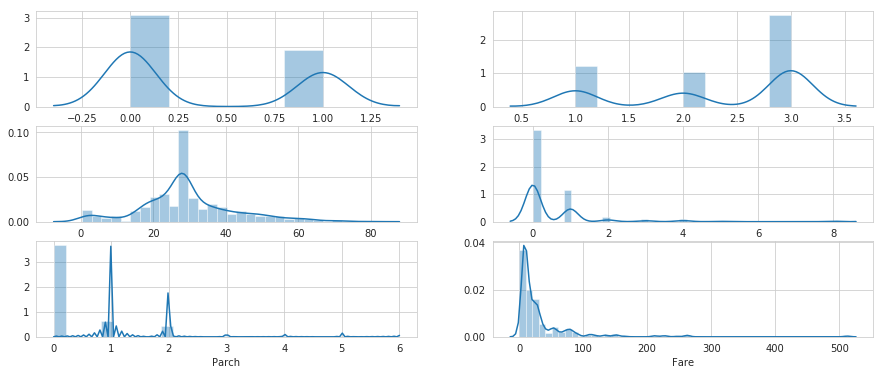

In [10]:
import warnings
warnings.filterwarnings('ignore')

no_of_plots = len(features_numeric)

ax = list(range(no_of_plots))
fig, ((ax[0], ax[1]), (ax[2], ax[3]), (ax[4], ax[5])) = plt.subplots(
                                    ncols=2,
                                    nrows=3,
                                    figsize=(15, 6))

for i in range(no_of_plots):
    sns.distplot(titanic_df[features_numeric[i]], ax = ax[i])
    
    

#### Exercise 4: Perfrom subselection and draw distributions separately for survived and not survived passengers

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_df_surv = titanic_df.loc[titanic_df['Survived'] == 1]
titanic_df_dead = titanic_df.loc[titanic_df['Survived'] == 0]

/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc

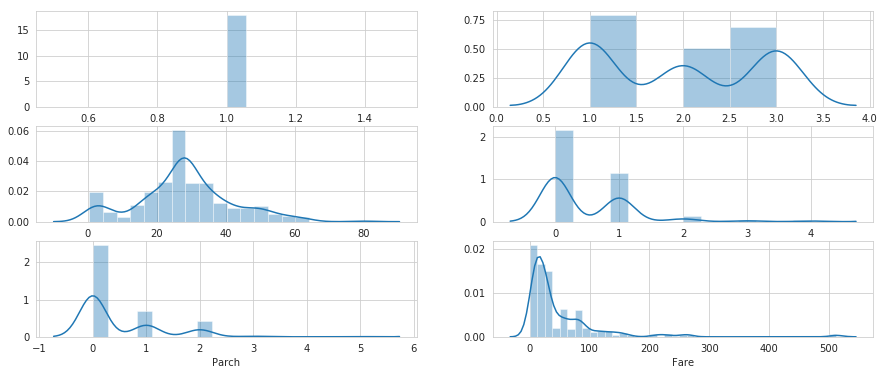

In [13]:
#distrubution for surivors

no_of_plots = len(features_numeric)

ax = list(range(no_of_plots))
fig, ((ax[0], ax[1]), (ax[2], ax[3]), (ax[4], ax[5])) = plt.subplots(
                                    ncols=2,
                                    nrows=3,
                                    figsize=(15, 6))

for i in range(no_of_plots):
    sns.distplot(titanic_df_surv[features_numeric[i]], ax = ax[i])

/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc

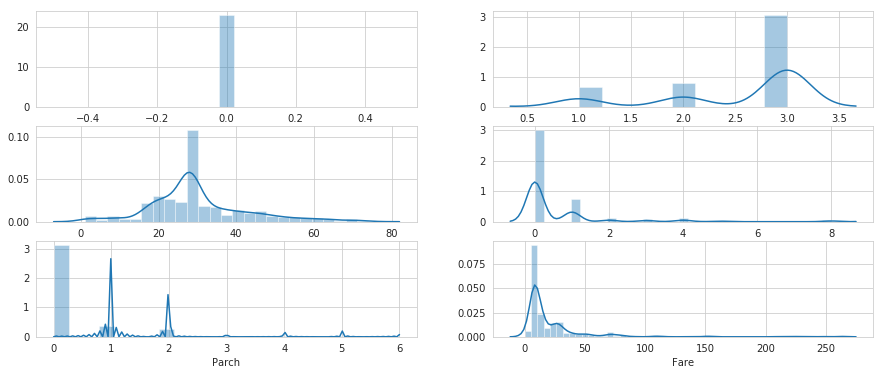

In [14]:
#distrubution for dead peepz

no_of_plots = len(features_numeric)

ax = list(range(no_of_plots))
fig, ((ax[0], ax[1]), (ax[2], ax[3]), (ax[4], ax[5])) = plt.subplots(
                                    ncols=2,
                                    nrows=3,
                                    figsize=(15, 6))

for i in range(no_of_plots):
    sns.distplot(titanic_df_dead[features_numeric[i]], ax = ax[i])

#### Exercise 5: Create binary feature for passenger sex (e.g. male -> 0, female->1)

In [15]:
titanic_df['Binary_Sex'] = titanic_df['Sex'].replace(['female', 'male'], [0, 1])

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binary_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


#### Exercise 7*: Extract nontrivial titul from name of the passenger (Col. Sir. Dr. etc.) and create a feature equal to 1 if titul is nontrivial, and 0 if trivial

In [40]:
titanic_df['Title']=0
titanic_df['Title']=titanic_df.Name.str.extract('(([A-Za-z]+)\.)')

# titanic_df.head()

titanic_df['Nontriv_Titles'] = titanic_df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Rev', 'Countess',
                                                        'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Sir'], 
                                                       [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0])

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binary_Sex,Title,Nontriv_Titles,Cabin_Length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr.,Mr.,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs.,Mrs.,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss.,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs.,Mrs.,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr.,Mr.,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,Mr.,Mr.,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Mr.,Mr.,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,Master.,Master.,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,Mrs.,Mrs.,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,Mrs.,Mrs.,0


#### Exercise 8: Construct feature of cabin name length, if NaN set feature to 0

In [45]:
titanic_df['Cabin_Length'] = titanic_df['Cabin'].apply(lambda x: 0 if x!= x else len(x))

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binary_Sex,Title,Nontriv_Titles,Cabin_Length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr.,Mr.,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs.,Mrs.,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss.,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs.,Mrs.,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr.,Mr.,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,Mr.,Mr.,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Mr.,Mr.,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,Master.,Master.,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,Mrs.,Mrs.,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,Mrs.,Mrs.,0


In [43]:
# titanic_df['Cabin_Length'] = 0

# for row in range(len(titanic_df.Cabin)):
#     if pd.isna(titanic_df.Cabin[row]):
#         titanic_df.Cabin_Length[row] = 0
#     else:
#         titanic_df.Cabin_Length[row] = len(titanic_df.Cabin[row])

#### Exercise 9: For all constructed variables draw histograms for 
a) general train sample
b) survived
c) not survived
render set of all histograms for whole dataset on one .png file (adding titles to histograms would be highly appreciated)

CONSTRUCTED VARIABLES: non-trivial titles, title, binary sex. Histograms for these three!

In [18]:
features_cat.append('Title')
print(features_cat)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title']


In [19]:
features_numeric.append('Nontriv_Titles')
features_numeric.append('Binary_Sex')
features_numeric.append('Cabin_Length')
features_numeric

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Nontriv_Titles',
 'Binary_Sex',
 'Cabin_Length']

##### a) general train sample

In [20]:
titanic_df_old = titanic_df.loc[titanic_df['Age'] > 40]

In [21]:
title_occurences= titanic_df_old['Title'].value_counts()
title_occurences

Mr       89
Mrs      36
Miss     10
Dr        4
Rev       4
Col       2
Major     2
Sir       1
Lady      1
Capt      1
Name: Title, dtype: int64

In [34]:
import pandas
from collections import Counter
a = titanic_df_old['Title']
letter_counts = Counter(a)

letter_counts


# df = pandas.DataFrame.from_dict(letter_counts, orient='index')
# df.plot(kind='bar', ax = ax4)

Counter({'Mr': 89,
         'Miss': 10,
         'Mrs': 36,
         'Rev': 4,
         'Dr': 4,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Col': 2,
         'Capt': 1})

/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


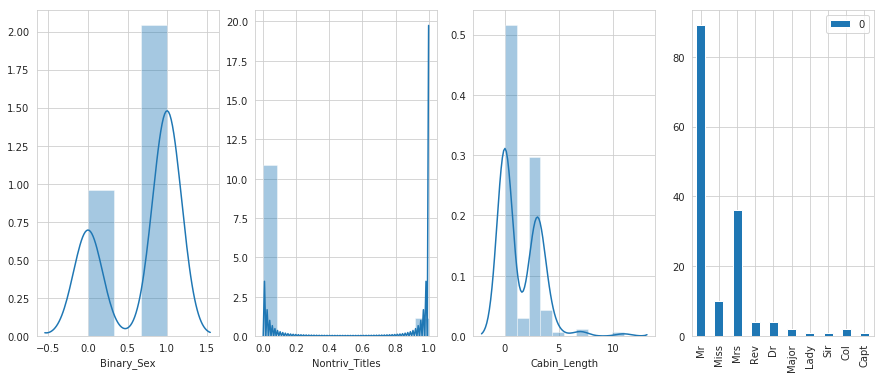

In [35]:
# non-trivial titles, title, binary sex

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15, 6))
sns.distplot(titanic_df_old['Binary_Sex'], ax = ax1)
sns.distplot(titanic_df_old['Nontriv_Titles'], ax = ax2)
sns.distplot(titanic_df_old['Cabin_Length'], ax = ax3)

from collections import Counter
a = titanic_df_old['Title']
letter_counts = Counter(a)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar', ax = ax4)

##### b) Survived

In [23]:
titanic_df_surv = titanic_df.loc[titanic_df['Survived'] == 1]
titanic_df_dead = titanic_df.loc[titanic_df['Survived'] == 0]

In [38]:
titanic_df_surv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binary_Sex,Title,Nontriv_Titles,Cabin_Length
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,0,Mrs,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,0,Mrs,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,0,Mrs,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,0,Mrs,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,0,Miss,0,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,0,Miss,0,4
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S,0,Mrs,0,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.00,0,0,244373,13.0000,NaN,S,1,Mr,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.00,0,0,2649,7.2250,NaN,C,0,Mrs,0,0


In [25]:
title_occurences= titanic_df_surv['Title'].value_counts()
title_occurences

Miss        127
Mrs          99
Mr           81
Master       23
Dr            3
Mlle          2
Col           1
Major         1
Mme           1
Sir           1
Ms            1
Lady          1
Countess      1
Name: Title, dtype: int64

/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


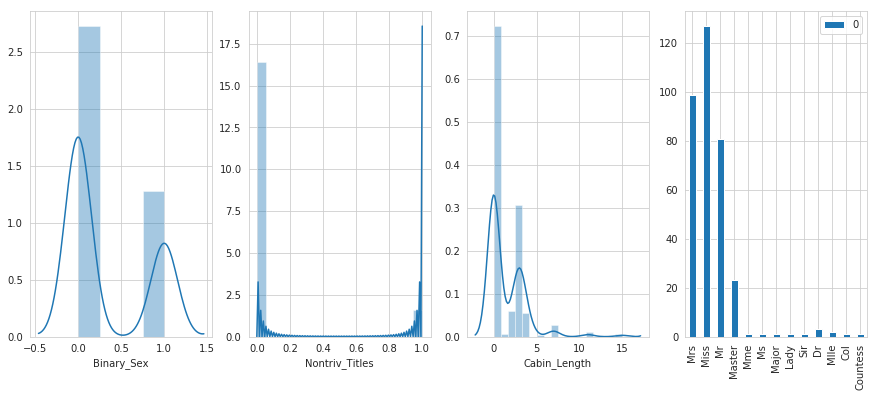

In [26]:
# non-trivial titles, title, binary sex

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15, 6))
sns.distplot(titanic_df_surv['Binary_Sex'], ax = ax1)
sns.distplot(titanic_df_surv['Nontriv_Titles'], ax = ax2)
sns.distplot(titanic_df_surv['Cabin_Length'], ax = ax3)

import pandas
from collections import Counter
a = titanic_df_surv['Title']
letter_counts = Counter(a)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar', ax = ax4)

##### c) Not Survived

In [27]:
titanic_df_dead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binary_Sex,Title,Nontriv_Titles,Cabin_Length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,0,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,Mr,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Mr,0,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,Master,1,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,1,Mr,0,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,1,Mr,0,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,0,Miss,0,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,1,Master,1,0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,0,Mrs,0,0


In [28]:
title_occurences= titanic_df_dead['Title'].value_counts()
title_occurences

Mr          436
Miss         55
Mrs          26
Master       17
Rev           6
Dr            4
Col           1
Capt          1
Don           1
Major         1
Jonkheer      1
Name: Title, dtype: int64

/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


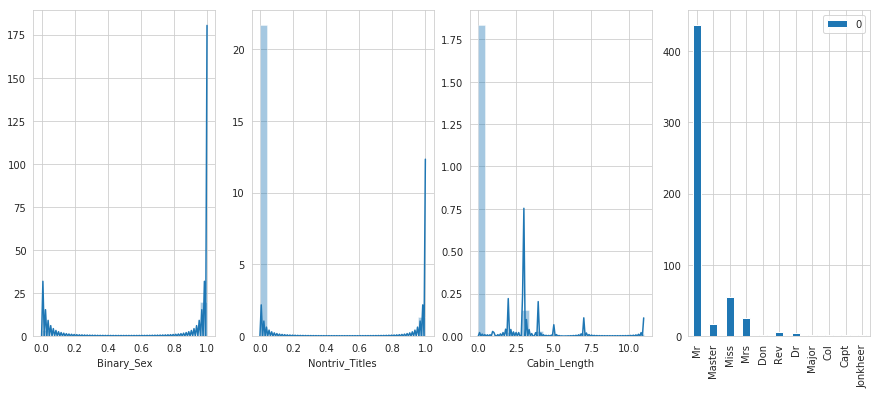

In [29]:
# non-trivial titles, title, binary sex

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15, 6))
sns.distplot(titanic_df_dead['Binary_Sex'], ax = ax1)
sns.distplot(titanic_df_dead['Nontriv_Titles'], ax = ax2)
sns.distplot(titanic_df_dead['Cabin_Length'], ax = ax3)

import pandas
from collections import Counter
a = titanic_df_dead['Title']
letter_counts = Counter(a)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar', ax = ax4)

#### Exercise 10: Fit KNearestNeighbour classifier on all constructed numerical variables for train sample

In [30]:
features_numeric

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Nontriv_Titles',
 'Binary_Sex',
 'Cabin_Length']

In [31]:
#k-fold split

acc = 0
folds = 5
train_n_test = []
for train_index,test_index in model_selection.KFold(folds).split(titanic_df):
    train_n_test.append((train_index,test_index))
    
## Pick which dataset to use out of the k-fold
data_set_no = 0    # First dataset
train_index = train_n_test[data_set_no][0]   #train
test_index =  train_n_test[data_set_no][1]   #test

## Choose the target (Survived) 
X_train = titanic_df.loc[train_index, features_numeric]
y_train = titanic_df.loc[train_index, 'Survived']

X_test = titanic_df.loc[test_index, features_numeric]
y_test = titanic_df.loc[test_index, 'Survived']

In [32]:
X_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Nontriv_Titles,Binary_Sex,Cabin_Length
179,0,3,36.0,0,0,0.0000,0,1,0
180,0,3,28.0,8,2,69.5500,0,0,0
181,0,2,28.0,0,0,15.0500,0,1,0
182,0,3,9.0,4,2,31.3875,1,1,0
183,1,2,1.0,2,1,39.0000,1,1,2


In [47]:
KNN = sklearn.neighbors.KNeighborsClassifier(5)

KNN_fitted = KNN.fit(X_train, 
                     y_train)

#### Exercise 11: Construct prediction of resulting method on train and test subsamples

In [ ]:
y_pred = KNN_fitted.predict(X_test)

#### Exercise 12: Computer adjusted mutual info score of prediction for train and test

In [ ]:
print(sklearn.metrics.mutual_info_score(y_test, y_pred))

#### Exercise 13: Write custom transformer that perform modifications from exetcises 5-8, np.median([Age]) data should be stored in transformer
Note: if this task is not solved, as a dummy use just identical transformer of all numeric features.

In [ ]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

from sklearn.preprocessing import *
from sklearn.decomposition import*
from sklearn.neighbors import*

In [ ]:
titanic_df_test = pd.read_csv('titanic.csv')
titanic_df_test.head()

In [ ]:
class Custom_Transformer(TransformerMixin):
    def __init__(self, df = titanic_df_test):
        self.medianAge = df.Age.median()
        self.df = df

    def Binary_Sex(self, df = titanic_df, col = 'Sex'):
        df['Binary_Sex'] = df[col].replace(['female', 'male'], [0, 1])
        return df
    
    def replaceNaN(self, df = titanic_df, col = 'Age'):
        df[col] = df[col].fillna(self.medianAge)
        return df
    
    def Nontriv_title(self, df = titanic_df, col = 'Name'):
        df['Title'] = 0
        df['Title'] = titanic_df[col].str.extract('([A-Za-z]+)\.')
        df['Nontriv_Titles'] = df.Title.replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Rev', 'Countess', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Sir'], 
                                         [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0])
        return df
    
    def count_len_str_Cabin(self, df = titanic_df, col = 'Cabin'):
        titanic_df['Cabin_Length'] = 0
        for row in range(len(df[col])):
            if pd.isna(df[col][row]):
                df['Cabin_Length'][row] = 0
            else:
                df['Cabin_Length'][row] = len(df[col][row])

In [ ]:
transformer_instance = Custom_Transformer()
titanic_df_test = transformer_instance.Binary_Sex(col='Sex').head(3)
titanic_df_test = transformer_instance.replaceNaN()
titanic_df_test = transformer_instance.Nontriv_title()
# titanic_df_test = transformer_instance.count_len_str_Cabin()

In [ ]:
titanic_df_test

#### Exercise 14: Create a pipeline with custom transformer and a KnearestNeighbour classifier. Train it on train subsample, predict on both train and test, compute mutual info and compare with previous result

In [ ]:
class CustomTransformer_PipeNtrainNtest(TransformerMixin):
    def __init__(self, classifier = sklearn.neighbors.KNeighborsClassifier(5)):
        self.classifier = classifier
        self.pipeline = Pipeline([\
                 ('polynomial features', PolynomialFeatures()), \
                 ('pca', PCA()), \
                 ('regression', LinearRegression())])

    def fit(self, X, y=None):
        self.pipeline = self.pipeline.fit(X,y)
        return self.pipeline

    def predict(self, X):
        return self.pipeline.predict(X)

In [ ]:
Pipeline_Instance = CustomTransformer_PipeNtrainNtest()
Pipeline_Instance_fit = Pipeline_Instance.fit(X_train, y_train)
y_pred2 = Pipeline_Instance_fit.predict(X_test)


print('MutualScoreNoTransformer = ', sklearn.metrics.mutual_info_score(y_test, y_pred))
print('MutualScoreCustomPipe = ', sklearn.metrics.mutual_info_score(y_test, y_pred2))

#### Exercise 15: Add to pipeline StandardScaler and Normalizer preprocessors on top of custom transformer. Compare results with previous pipeline

In [ ]:
class CustomTransformer_PipeNtrainNtest(TransformerMixin):
    def __init__(self, classifier = sklearn.neighbors.KNeighborsClassifier(5)):
        self.classifier = classifier
        self.pipeline = Pipeline([('scaler', StandardScaler()), \
                 ('normalizer', Normalizer()), \
                 ('polynomial features', PolynomialFeatures()), \
                 ('pca', PCA()), \
                 ('regression', LinearRegression())])
    def fit(self, X, y=None):
        self.pipeline = self.pipeline.fit(X,y)
        return self.pipeline

    def predict(self, X):
        return self.pipeline.predict(X)


In [ ]:
Pipeline_Instance_ScalerNnormalizer = CustomTransformer_PipeNtrainNtest()
Pipeline_Instance_ScalerNnormalizer_fit = Pipeline_Instance.fit(X_train, y_train)
y_pred3 = Pipeline_Instance_ScalerNnormalizer_fit.predict(X_test)


print('MutualScoreNoTransformer = ', sklearn.metrics.mutual_info_score(y_test, y_pred))
print('MutualScoreCustomPipe = ', sklearn.metrics.mutual_info_score(y_test, y_pred2))
print('MutualScoreCustomPipe_ScalerNnormalizer = ', sklearn.metrics.mutual_info_score(y_test, y_pred3))

#### Exercise 16*: Apply XGBClassifier to the generate features, compute resulted quality

#### CANT install xgboost

#### CANT install xgboost

#### CANT install xgboost

#### CANT install xgboost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

#### Exercise 17*: Compute mutual info score between all features and target varible, select 75% of best features. Implement custom transformer that implement this feature selection, add it to pipeline, compare results with previous ones.

In [48]:
def prepare_data(X):
    # forgot some details for preparing the data
    X.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
    X['Age'] = X['Age'].fillna(X['Age'].median())
    return X
prepare_data_transformer = preprocessing.FunctionTransformer(prepare_data)
 
def feature_selection_f(X):
    all_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
    scores = feature_selection.mutual_info_classif(titanic_df[all_features], titanic_df['Survived'])
    feature_scores = {value: scores[key] for (key, value) in enumerate(all_features)}
    feature_scores = [k for k, v in sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)]
    best_features = feature_scores[0 : int(len(feature_scores) * .75)]
    X = X[best_features]
    return X
feature_transformer = preprocessing.FunctionTransformer(feature_selection_f)
 
pipe = pipeline.Pipeline([\
                          ('prepare_data', prepare_data_transformer),\
                          ('feature_selection', feature_transformer),\
                          ('scaler', preprocessing.StandardScaler()),\
                          ('normalizer', preprocessing.Normalizer())\
                         ])
 
titanic_df_transformed = pipe.fit_transform(titanic_df)
 
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    titanic_df_transformed, 
    titanic_df['Survived'], 
    test_size=0.2, 
    random_state=2020)
 
 
# KNN
model = KNeighborsClassifier(n_neighbors=3)
 
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
 
y_pred_train = model.predict(X_train)
 
accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
 
accuracy, recall, precision
 
 
#XGBoost
import xgboost as xgb
 
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)
 
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
 
steps = 20  # The number of training iterations
 
model = xgb.train(param, D_train, steps)
 
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
 
print("Precision = {}".format(metrics.precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(metrics.recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(metrics.accuracy_score(y_test, best_preds)))

NameError: name 'pipeline' is not defined